In [1]:
# !pip install fuzzy-c-means

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from fcmeans import FCM
import seaborn as sns 

# Reading Dataset

In [3]:
df=pd.read_csv("E:Data/student-mat-pass-or-fail.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


# Preprocessing

# Handling missing values

In [4]:
for i in df.describe().columns:
    df[i]=df[i].fillna((df[i].median()))

print("Data after handling missing values\n",df.isnull().sum())

Data after handling missing values
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64


In [5]:
df.isna().sum().any()

False

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int64
 12  famsup      395 non-null    int64
 13  paid        395 non-null    int64
 14  activities  395 non-null    int64
 15  nursery     395 non-null    int64
 16  higher      395 non-null    int64
 17  internet    395 non-null    int64
 18  romantic    395 non-null    int64
 19  famrel      395 non-null    int64
 20  freetime    395 non-null    int6

In [8]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,1.000000,1.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


# Correlation Between Features

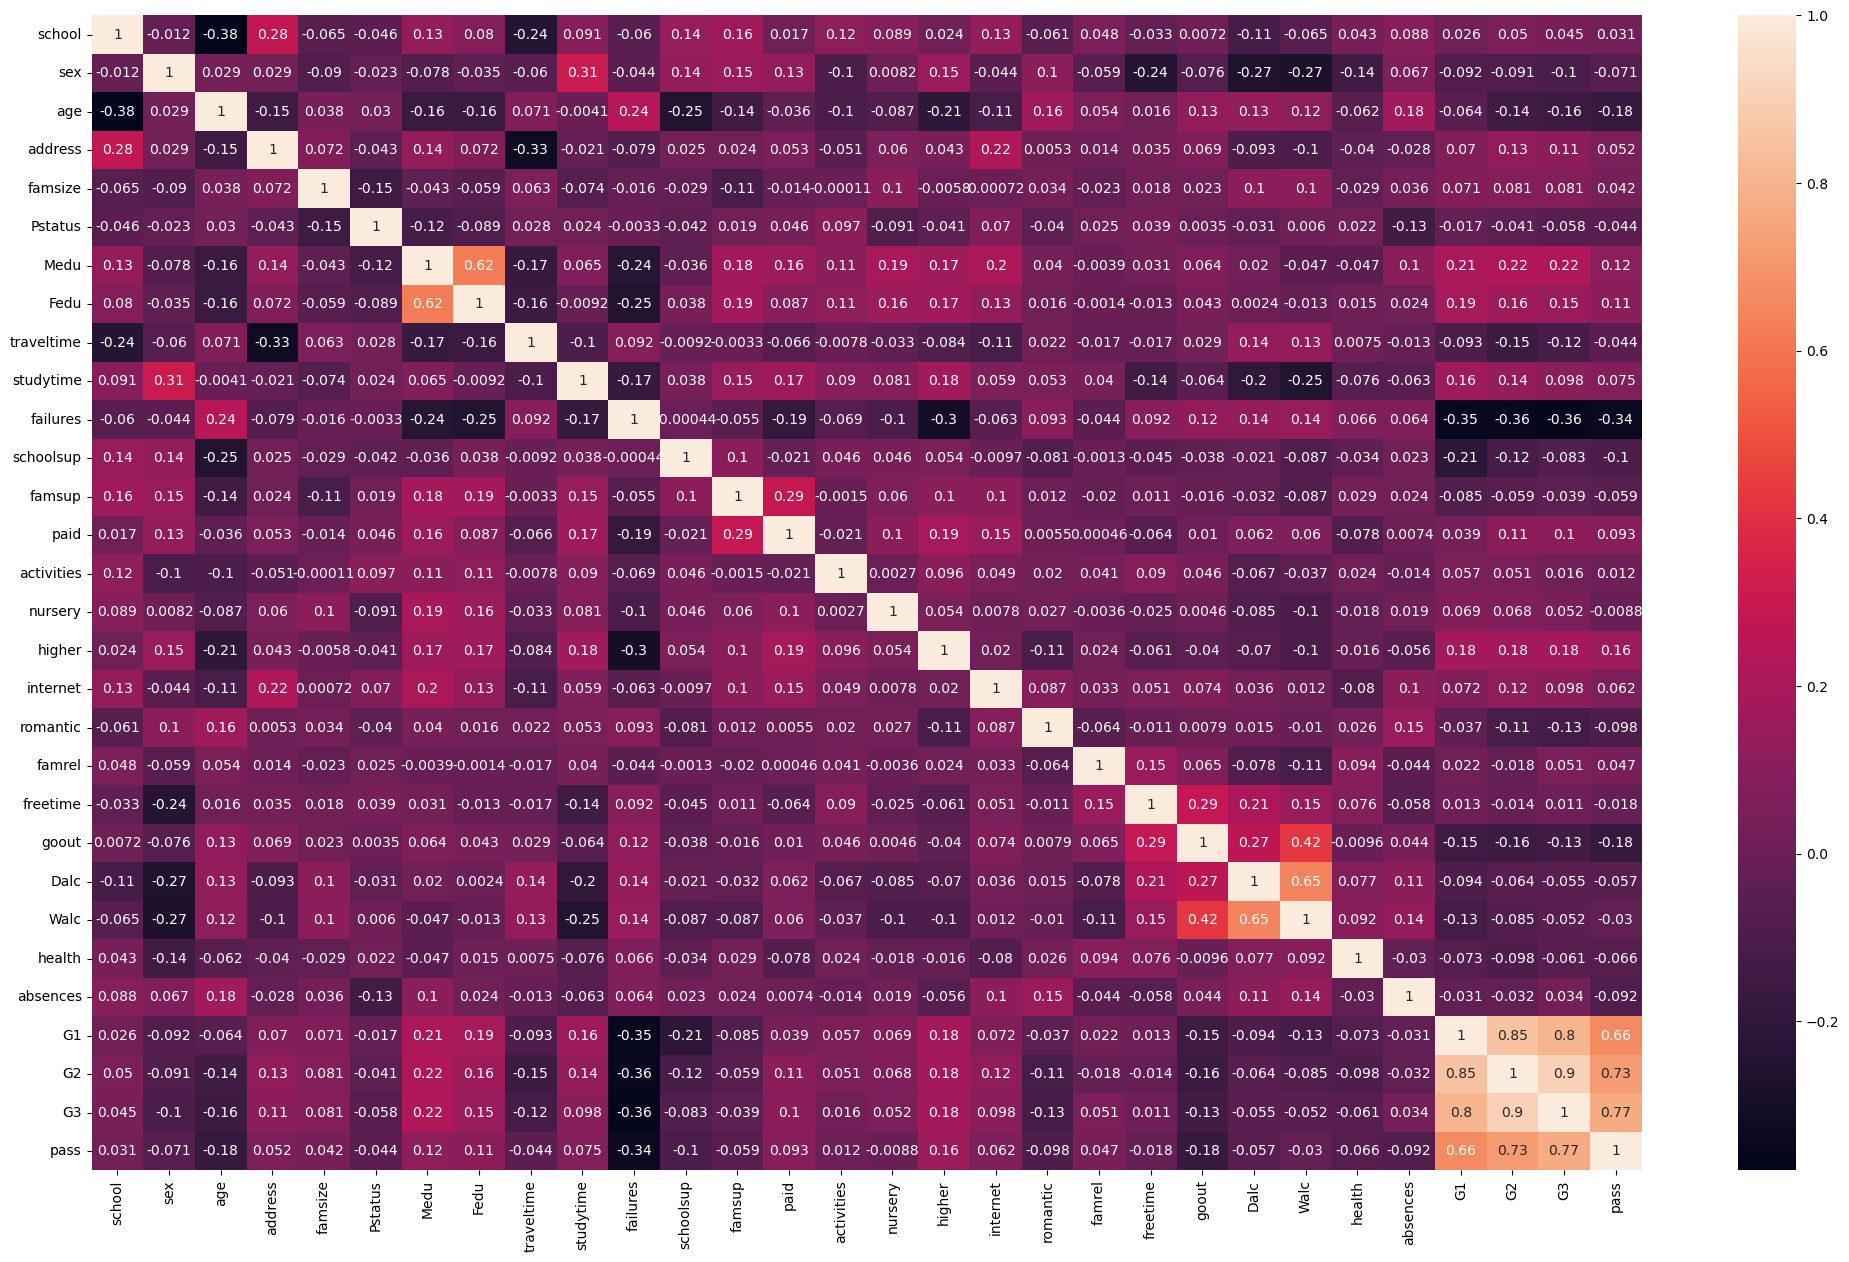

In [9]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Normalizing some features Using Standardscaler

In [10]:
df = df.copy()
col_names  = ["age","Medu","Fedu","traveltime","studytime","absences","G1","G2","G3","famrel","freetime","goout","health","Walc","Dalc"]
features = df[col_names]
scaler = StandardScaler(copy=True,with_mean=True,with_std=True).fit(features.values)
features = scaler.transform(features.values)
df[col_names] = features


# Declare target variable 

In [11]:
X=df.drop(columns=["pass"])
y=df["pass"]
X.shape

(395, 29)

# Check data if balanced or not

In [12]:
df['pass'].value_counts()

1    265
0    130
Name: pass, dtype: int64

<AxesSubplot:ylabel='pass'>

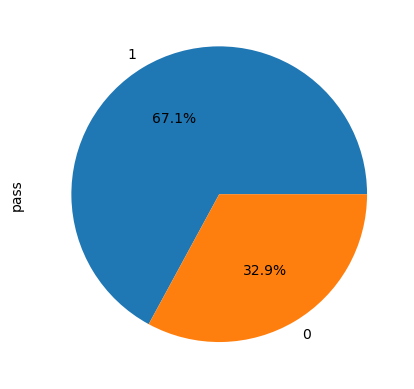

In [13]:
df['pass'].value_counts().plot.pie(autopct="%1.1f%%")

# Making the data balanced using oversampling

In [14]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

0    265
1    265
Name: pass, dtype: int64

<AxesSubplot:ylabel='pass'>

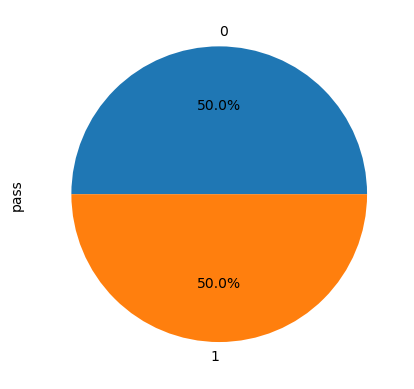

In [15]:
y.value_counts().plot.pie(autopct="%1.1f%%")

# FCM  Before applying PCA 

In [16]:
CM_B=FCM(n_clusters=2,random_state=0,max_iter=100,m=1.3)
CM_B.fit(X.to_numpy())
centers_B=CM_B.centers
pred_CM_B = CM_B.soft_predict(X.to_numpy()) #soft
print("Membership functions(Fuzzy Values) \n \n", pred_CM_B)                      # Fuzzy values (membership function)

Membership functions(Fuzzy Values) 
 
 [[0.77898037 0.22101963]
 [0.90272008 0.09727992]
 [0.72549488 0.27450512]
 ...
 [0.8010894  0.1989106 ]
 [0.77785309 0.22214691]
 [0.86153163 0.13846837]]


In [17]:
def alph_cut(alpha,y_fuzzy):
    label=[]
    memberships_length=len(y_fuzzy)
    for i in range(memberships_length):
        if (alpha<=y_fuzzy[i][0]):
            label.append(0)
        else:
            label.append(1)
    return label

In [18]:
predictied_B=alph_cut(.5,pred_CM_B)
correct_labels_B = sum(y == predictied_B)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels_B, y.size))


CM_accuracy_B=correct_labels_B/float(y.size)*100

print("Accuracy_score :",CM_accuracy_B)

Result: 464 out of 530 samples were correctly labeled.
Accuracy_score : 87.54716981132076


#  FCM After applying PCA 

# Compute Mean

In [19]:
df_meaned = X- np.mean(X , axis = 0)
print (df_meaned.shape)

(530, 29)


# Compute Covariance Matrix

In [20]:
cov_mat = np.cov(df_meaned , rowvar = False)   # rowvar = False >> work with df_meaned as transposed
print (cov_mat.shape)

(29, 29)


# Compute eigen_values and eigen_vectors

In [21]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print (eigen_vectors.shape)

(29, 29)


# sort the eigenvalues in  order

In [22]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]

#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print(sorted_eigenvectors.shape)

(29, 29)


# Declare the number of components

In [23]:
n_components =2       
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [24]:
X_reduced = np.dot(eigenvector_subset.transpose(),df_meaned.transpose()).transpose()
X_reduced.shape

(530, 2)

In [25]:
CM_A=FCM(n_clusters=2,   random_state=0  ,max_iter=100,m=1.3)
CM_A.fit(X_reduced)
centers_A=CM_A.centers
pred_CM_A = CM_A.soft_predict(X_reduced)
#pred_CM_A                              # Fuzzy values (membership function)

In [26]:
predictied_A=alph_cut(.8,pred_CM_A)

correct_labels_A = sum(y == predictied_A)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels_A, y.size))


CM_accuracy_A=correct_labels_A/float(y.size)*100

print("Accuracy_score :",CM_accuracy_A)

Result: 454 out of 530 samples were correctly labeled.
Accuracy_score : 85.66037735849056


In [27]:
Models=[ " FCM Before applying PCA" ,"FCM After applying PCA"]
model_data = [ CM_accuracy_B , CM_accuracy_A]
cols = ["Accuracy_score"]
compare=pd.DataFrame(data=model_data , index= Models , columns= cols)
compare.sort_values(ascending= False , by = ['Accuracy_score'])


,Accuracy_score
FCM Before applying PCA,87.547170
FCM After applying PCA,85.660377
